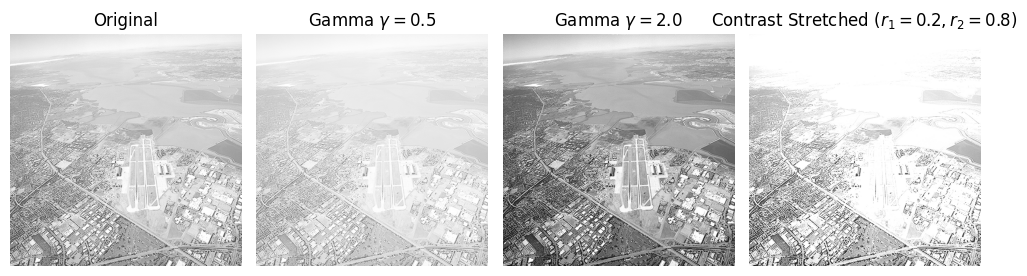

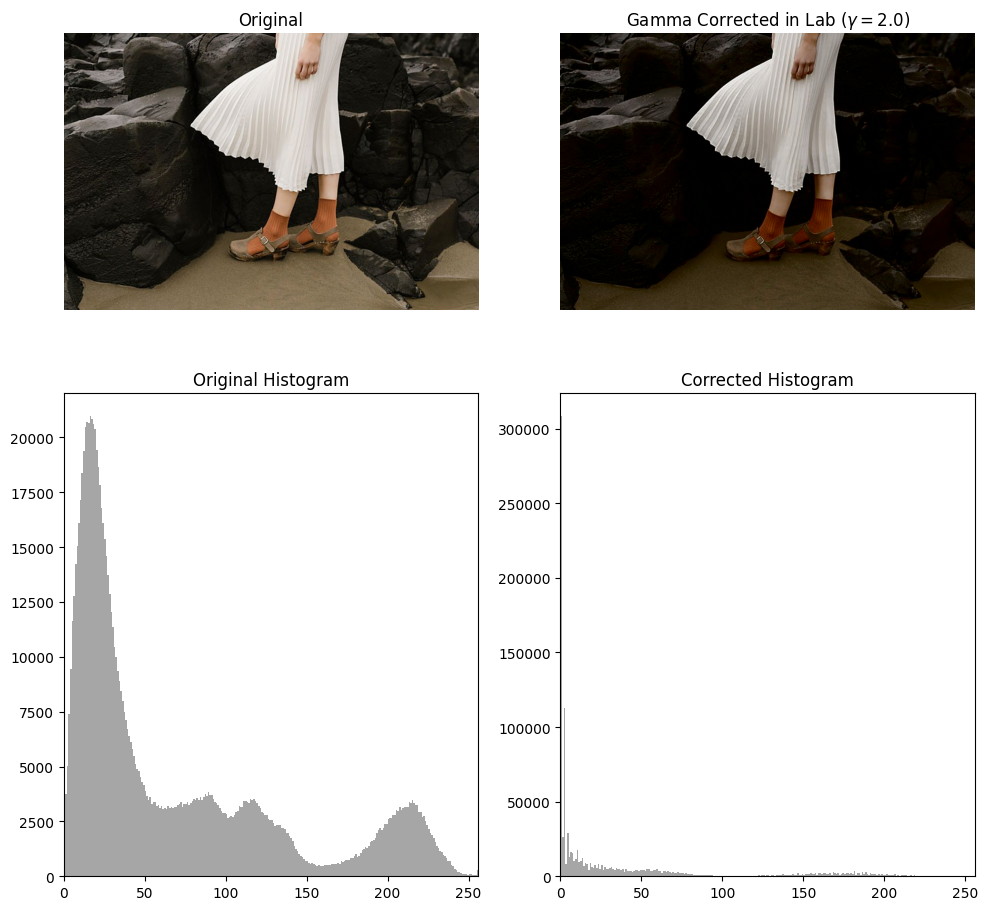

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#QUESTION 1

f = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)

assert f is not None

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

gamma_values = [0.5, 2.0]

for i, g in enumerate(gamma_values):
    table = np.array([((i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    h = cv.LUT(f, table)
    cv.imwrite(f'q1_gamma_{g}.png', h)
    
    plt.subplot(1, 4, i+2)
    plt.imshow(h, cmap='gray', vmin=0, vmax=255)
    plt.title(rf"Gamma $\gamma={g}$")
    plt.axis('off')


r1 = int(0.2 * 255)
r2 = int(0.8 * 255)

stretch_table = []

for i in range(256):
    if i < r1:
        val = 0
    elif i > r2:
        val = 255
    else:
        val = ((i - r1) / (r2 - r1)) * 255
    stretch_table.append(val)

stretch_table = np.array(stretch_table).astype('uint8')
contrast_img = cv.LUT(f, stretch_table)

cv.imwrite('q1_contrast_stretch.png', contrast_img)

plt.subplot(1, 4, 4)
plt.imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Contrast Stretched ($r_1=0.2, r_2=0.8$)")
plt.axis('off')

plt.tight_layout()
plt.show()


#QUESTION 2

f2 = cv.imread('Images/highlights_and_shadows.jpg')
assert f2 is not None

f2_lab = cv.cvtColor(f2, cv.COLOR_BGR2Lab)
L, a, b = cv.split(f2_lab)

gamma_lab = 2.0

L_norm = L/255
L_corrected = (np.power(L_norm, gamma_lab) * 255).astype('uint8')

f2_lab_corrected = cv.cvtColor(cv.merge((L_corrected, a, b)), cv.COLOR_Lab2BGR)
cv.imwrite('q2_lab_corrected.png', f2_lab_corrected)

plt.figure(figsize=(10, 10))

#Original
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(f2, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

#Corrected
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(f2_lab_corrected, cv.COLOR_BGR2RGB))
plt.title(rf"Gamma Corrected in Lab ($\gamma={gamma_lab}$)")
plt.axis('off')

#Original Histogram
plt.subplot(2, 2, 3)
plt.hist(f2.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Original Histogram")
plt.xlim([0, 256])

#Corrected Histogram
plt.subplot(2, 2, 4)
plt.hist(f2_lab_corrected.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Corrected Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()